In [3]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import pandas_profiling 
import seaborn as sns

import statsmodels.api as sm
from sklearn import metrics
import statsmodels.formula.api as smf

In [4]:
train_data = pd.read_csv('C:/Users/user/Desktop/train.csv')
test_data = pd.read_csv('C:/Users/user/Desktop/test.csv')
features = pd.read_csv('C:/Users/user/Desktop/features.csv')
stores = pd.read_csv('C:/Users/user/Desktop/stores.csv')

In [5]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
train_data2 = pd.merge(train_data,stores) 
train = pd.merge(train_data2,features)

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [10]:
test_data2 = pd.merge(test_data,stores)
test= pd.merge(test_data2,features)

In [11]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 15 columns):
Store           115064 non-null int64
Dept            115064 non-null int64
Date            115064 non-null object
IsHoliday       115064 non-null bool
Type            115064 non-null object
Size            115064 non-null int64
Temperature     115064 non-null float64
Fuel_Price      115064 non-null float64
MarkDown1       114915 non-null float64
MarkDown2       86437 non-null float64
MarkDown3       105235 non-null float64
MarkDown4       102176 non-null float64
MarkDown5       115064 non-null float64
CPI             76902 non-null float64
Unemployment    76902 non-null float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 13.3+ MB


#### Training Data set

In [14]:
conti_train = train.select_dtypes(include = ['float64', 'int64','float32', 'int32'])
cat_train = train.select_dtypes(include = ['object'])


In [15]:
conti_train.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [16]:
cat_train.columns

Index(['Date', 'Type'], dtype='object')

In [17]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [18]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [19]:
conti_train.apply(continuous_var_summary).T.round(1).sort_values('NMISS',ascending=False).head(10)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
MarkDown2,111248.0,310322.0,3.709708e+08,3334.6,192.0,9475.4,8.978240e+07,-265.8,-1.0,2.0,7.0,41.6,192.0,1926.9,8549.7,16497.5,50366.6,104519.5
MarkDown4,134967.0,286603.0,4.566161e+08,3383.2,1481.3,6292.4,3.959410e+07,0.2,4.0,28.8,108.7,504.2,1481.3,3595.0,7871.4,12646.0,35785.3,67474.8
MarkDown3,137091.0,284479.0,1.973317e+08,1439.4,24.6,9623.1,9.260364e+07,-29.1,0.1,0.6,1.6,5.1,24.6,104.0,400.1,1059.9,63143.3,141630.6
MarkDown1,150681.0,270889.0,1.091898e+09,7246.4,5347.4,8291.2,6.874435e+07,0.3,17.8,149.2,375.2,2240.3,5347.4,9210.9,15282.5,21801.4,41524.0,88646.8
MarkDown5,151432.0,270138.0,7.009750e+08,4629.0,3359.4,5962.9,3.555603e+07,135.2,352.0,715.5,1070.8,1878.4,3359.4,5563.8,8337.7,11269.2,27754.2,108519.3
Store,421570.0,0.0,9.359084e+06,22.2,22.0,12.8,1.635000e+02,1.0,1.0,3.0,5.0,11.0,22.0,33.0,40.0,43.0,45.0,45.0
Dept,421570.0,0.0,1.865882e+07,44.3,37.0,30.5,9.298000e+02,1.0,1.0,4.0,7.0,18.0,37.0,74.0,92.0,95.0,98.0,99.0
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.3,7612.0,22711.2,5.157979e+08,-4988.9,5.0,60.0,291.1,2079.6,7612.0,20205.9,42845.7,61202.0,106479.6,693099.4
Size,421570.0,0.0,5.764039e+10,136727.9,140167.0,60980.6,3.718632e+09,34875.0,34875.0,39690.0,39910.0,93638.0,140167.0,202505.0,204184.0,206302.0,219622.0,219622.0
Temperature,421570.0,0.0,2.533217e+07,60.1,62.1,18.4,3.403000e+02,-2.1,18.3,27.3,34.0,46.7,62.1,74.3,83.6,87.3,92.8,100.1


In [20]:
cat_train.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Date,421570,0,2011-12-23,3027,0.72
Type,421570,0,A,215478,51.11


### Testing Data set

In [21]:
conti_test = test.select_dtypes(include = ['float64', 'int64','float32', 'int32'])
cat_test = test.select_dtypes(include = ['object'])

In [22]:
conti_test.columns

Index(['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [23]:
cat_test.columns

Index(['Date', 'Type'], dtype='object')

In [24]:
conti_test.apply(continuous_var_summary).T.round(1).sort_values('NMISS',ascending=False).head(10)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,76902.0,38162.0,1.360868e+07,177.0,192.3,41.2,1.700700e+03,131.2,131.3,131.5,132.0,138.4,192.3,223.2,225.9,227.8,228.7,229.0
Unemployment,76902.0,38162.0,5.282193e+05,6.9,6.8,1.6,2.500000e+00,3.7,3.9,3.9,5.0,5.8,6.8,8.0,8.9,9.9,10.2,10.2
MarkDown2,86437.0,28627.0,3.227602e+08,3734.1,742.6,8323.5,6.928057e+07,-35.7,0.0,6.1,25.8,180.4,742.6,2735.7,9277.3,22671.7,42920.2,71074.2
MarkDown4,102176.0,12888.0,3.429250e+08,3356.2,840.9,7570.5,5.731249e+07,0.2,2.6,17.0,37.4,155.5,840.9,3096.9,7674.4,14191.0,44739.3,65344.6
MarkDown3,105235.0,9829.0,2.528890e+08,2403.1,78.3,13767.9,1.895562e+08,-179.3,0.2,1.2,3.1,15.1,78.3,272.6,698.9,2361.6,86476.7,149483.3
MarkDown1,114915.0,149.0,8.836063e+08,7689.2,4842.3,10698.8,1.144635e+08,-2781.4,20.8,189.5,457.7,1966.5,4842.3,9439.1,15325.0,23140.9,65757.6,103185.0
Store,115064.0,0.0,2.558817e+06,22.2,22.0,12.8,1.641000e+02,1.0,1.0,3.0,5.0,11.0,22.0,33.0,40.0,43.0,45.0,45.0
Dept,115064.0,0.0,5.101883e+06,44.3,37.0,30.7,9.398000e+02,1.0,1.0,4.0,7.0,18.0,37.0,74.0,92.0,95.0,98.0,99.0
Size,115064.0,0.0,1.570597e+10,136497.7,140167.0,61106.9,3.734056e+09,34875.0,34875.0,39690.0,39910.0,93638.0,140167.0,202505.0,204184.0,206302.0,219622.0,219622.0
Temperature,115064.0,0.0,6.206760e+06,53.9,54.5,18.7,3.506000e+02,-7.3,11.4,24.0,30.0,39.8,54.5,67.4,79.5,83.8,92.1,102.0


In [25]:
cat_test.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Date,115064,0,2012-12-21,3002,2.61
Type,115064,0,A,58713,51.03


In [ ]:
profile_report = pandas_profiling.ProfileReport(train)
profile_report.to_file(output_file = 'profile_report.html')

In [ ]:
profile_report2 = pandas_profiling.ProfileReport(test)
profile_report2.to_file(output_file = 'profile_report2.html')

#### Correlation

In [28]:
corrm = train.corr()
corrm

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238
Temperature,-0.050097,0.004437,-0.002312,-0.155949,-0.058313,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.003361,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,0.345673,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
MarkDown2,-0.035173,0.000290,0.024130,0.334818,0.108827,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
MarkDown3,-0.031556,0.001784,0.060385,0.427960,0.048913,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818


In [29]:
corrm2 = test.corr()
corrm2

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136
Fuel_Price,0.153425,0.000554,-0.126443,0.055088,0.073938,1.000000,0.083320,-0.161963,-0.005827,0.034199,0.012722,-0.465721,0.417126
MarkDown1,-0.091707,-0.002353,0.355257,0.309614,-0.168899,0.083320,1.000000,0.001777,-0.090085,0.804449,0.061714,-0.028729,0.019241
MarkDown2,-0.041370,0.001292,0.265402,0.157526,-0.324280,-0.161963,0.001777,1.000000,-0.063757,-0.101784,-0.014159,-0.059350,-0.000547
MarkDown3,-0.025177,0.000247,0.496062,0.050088,-0.049771,-0.005827,-0.090085,-0.063757,1.000000,-0.059576,-0.015305,-0.022021,0.006298
MarkDown4,0.010331,0.002510,0.289700,0.155448,-0.059583,0.034199,0.804449,-0.101784,-0.059576,1.000000,0.024163,-0.056629,0.021993


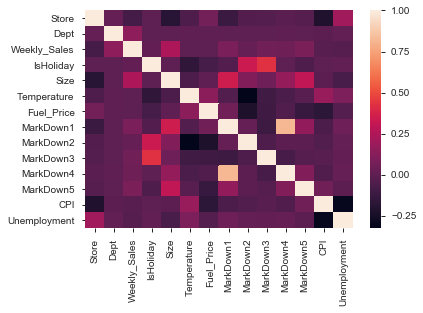

In [30]:
sns.heatmap(train.corr())

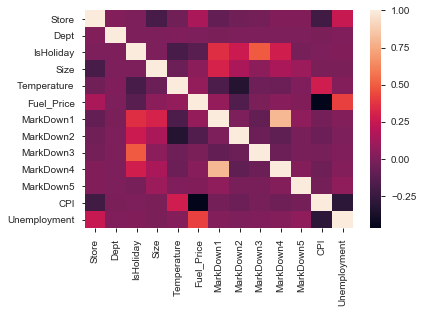

In [31]:
sns.heatmap(test.corr())

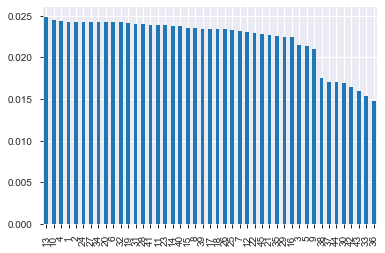

In [32]:
train['Store'].value_counts(normalize=True).plot(kind = 'bar',fig=(3,4))

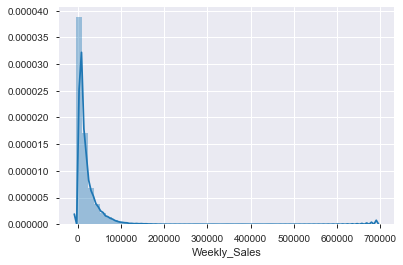

In [33]:
sns.distplot(train.Weekly_Sales)

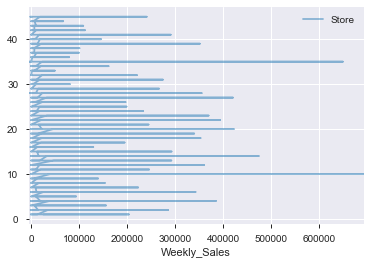

In [34]:
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

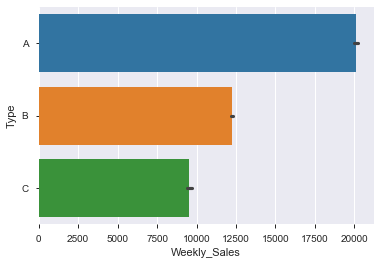

In [35]:
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

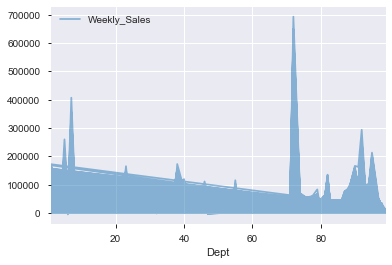

In [36]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(3,4))

#### Missing Value treatment

In [37]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [38]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [39]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

In [40]:
train=train.fillna(0)
test=test.fillna(0)

In [41]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [42]:
test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

### Outlier Treatment

In [43]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

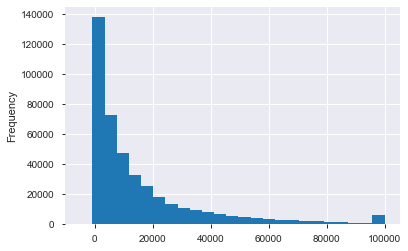

In [44]:
train.Weekly_Sales.plot.hist(bins=25)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 71.9+ MB


In [46]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [47]:
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [48]:
train.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [49]:
test.Type.value_counts()

A    58713
B    44500
C    11851
Name: Type, dtype: int64

In [50]:
train.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [51]:
test.IsHoliday.value_counts()

False    106136
True       8928
Name: IsHoliday, dtype: int64

In [52]:
train_test_data = [train, test]

In [53]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)
    

    
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [54]:
from datetime import datetime

In [55]:
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)

In [56]:
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [57]:
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [58]:
train.Christmas.value_counts()

0    415624
1      5946
Name: Christmas, dtype: int64

In [59]:
train.Super_Bowl.value_counts()

0    412675
1      8895
Name: Super_Bowl, dtype: int64

In [60]:
train.Thanksgiving.value_counts()

0    415611
1      5959
Name: Thanksgiving, dtype: int64

In [61]:
train.Labour_Day.value_counts()

0    412709
1      8861
Name: Labour_Day, dtype: int64

In [62]:
test.Christmas.value_counts()

0    112076
1      2988
Name: Christmas, dtype: int64

In [63]:
test.Super_Bowl.value_counts()

0    112100
1      2964
Name: Super_Bowl, dtype: int64

In [64]:
test.Thanksgiving.value_counts()

0    112088
1      2976
Name: Thanksgiving, dtype: int64

In [65]:
test.Labour_Day.value_counts()

0    115064
Name: Labour_Day, dtype: int64

In [66]:
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

### Feature Selection

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
Store             421570 non-null int64
Dept              421570 non-null int64
Date              421570 non-null datetime64[ns]
Weekly_Sales      421570 non-null float64
IsHoliday         421570 non-null int64
Type              421570 non-null int64
Size              421570 non-null int64
Temperature       421570 non-null float64
Fuel_Price        421570 non-null float64
MarkDown1         421570 non-null float64
MarkDown2         421570 non-null float64
MarkDown3         421570 non-null float64
MarkDown4         421570 non-null float64
MarkDown5         421570 non-null float64
CPI               421570 non-null float64
Unemployment      421570 non-null float64
Date_dayofweek    421570 non-null int64
Date_month        421570 non-null int64
Date_year         421570 non-null int64
Date_day          421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(9)
memory usag

In [68]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [69]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
2,1,3,2010-02-05,13740.12,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
3,1,4,2010-02-05,39954.04,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
4,1,5,2010-02-05,32229.38,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [70]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
2,1,3,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
3,1,4,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
4,1,5,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


In [71]:
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

In [72]:
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 15), (421570,), (115064, 15))

### Buildings of Models

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [76]:
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
('scorbe:'+str(acc_linear) + ' percent')

'scorbe:8.86 percent'

#### Random Forest

In [77]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
("Accuracy: %i %% \n"%acc_rf)

'Accuracy: 99 % \n'

#### Decision Tree

In [78]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
(str(acc_dt) + ' percent')

NameError: name 'DecisionTreeRegressor' is not defined

#### Comparing Model

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear, acc_rf,acc_dt]
    })

models.sort_values(by='Score', ascending=False)

#### predicting sale value for test data based n highest score model

In [ ]:
submission = pd.DataFrame({
        "Store_Dept_Date": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted.csv', index=False)
submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [ ]:
submission.head()